In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-btc-usd-stock-dataset/BTC-USD_stock_data.csv


In [2]:
path = '/kaggle/input/bitcoin-btc-usd-stock-dataset/BTC-USD_stock_data.csv'
df = pd.read_csv(path)
df.index = df.index + 1
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
3,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
4,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
5,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
# Groupby Data by Month
df['Date'] = pd.to_datetime(df['Date'])
grouped = df.groupby(df['Date'].dt.to_period('M')).agg({
    'High':'max',
    'Low': 'min',
    'Volume':'sum'
})
grouped = grouped.reset_index()
grouped


,Date,High,Low,Volume
0,2017-01,1191.099976,755.755981,5143971692
1,2017-02,1200.390015,946.690979,4282761200
2,2017-03,1280.310059,903.713013,10872455960
3,2017-04,1347.910034,1061.089966,9757448112
4,2017-05,2763.709961,1348.300049,34261856864
...,...,...,...,...
89,2024-06,71907.851562,58601.699219,726773965644
90,2024-07,69987.539062,53717.375000,953395573307
91,2024-08,65593.242188,49121.238281,1043105485208
92,2024-09,66480.695312,52598.699219,879117914822


Trade Volume By Year

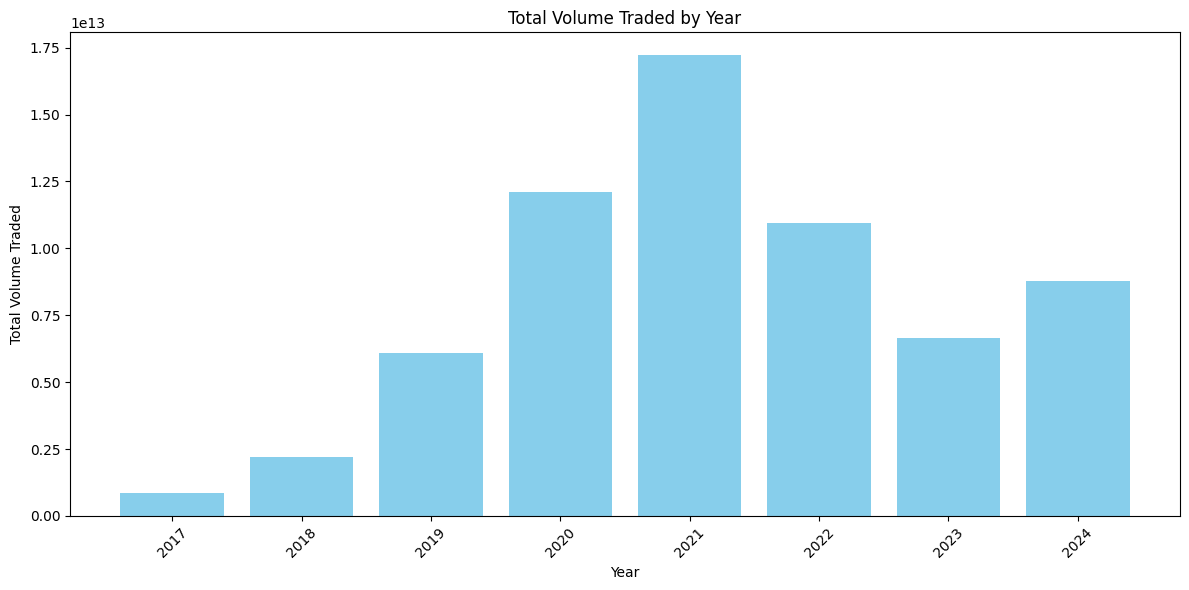

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

annual_volume = df.groupby('Year')['Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(annual_volume['Year'].astype(str), annual_volume['Volume'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Volume Traded')
plt.title('Total Volume Traded by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trade Volume Overtime

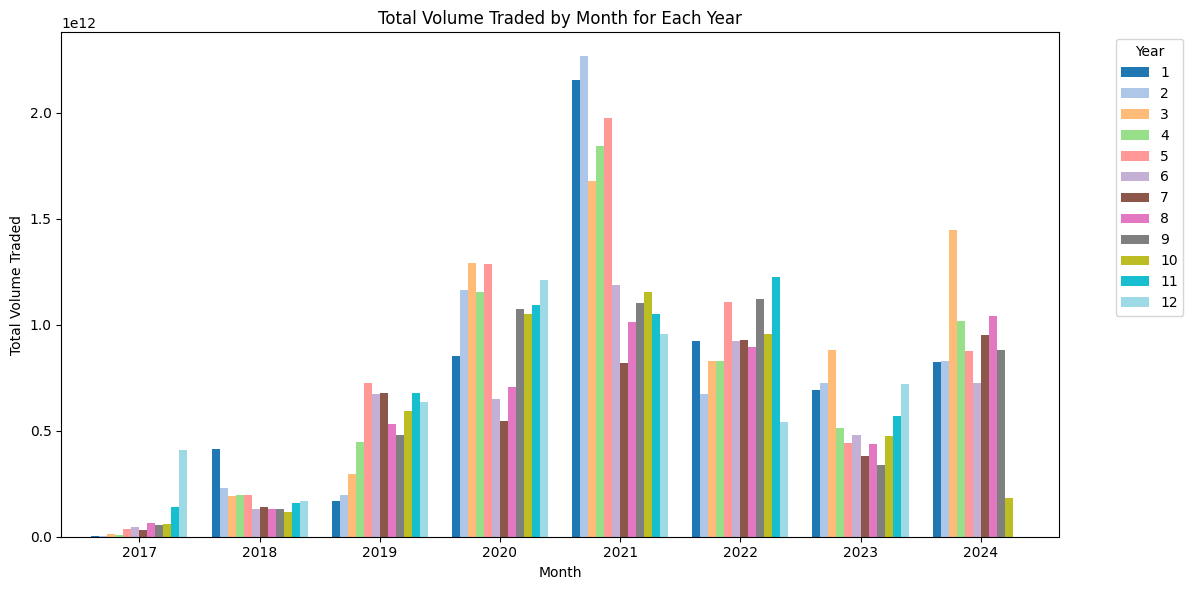

In [5]:
monthly_volume = df.groupby(['Year', 'Month'])['Volume'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='bar', width=0.8, ax=plt.gca(), colormap='tab20')
plt.xlabel('Month')
plt.ylabel('Total Volume Traded')
plt.title('Total Volume Traded by Month for Each Year')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Overtime Analysis

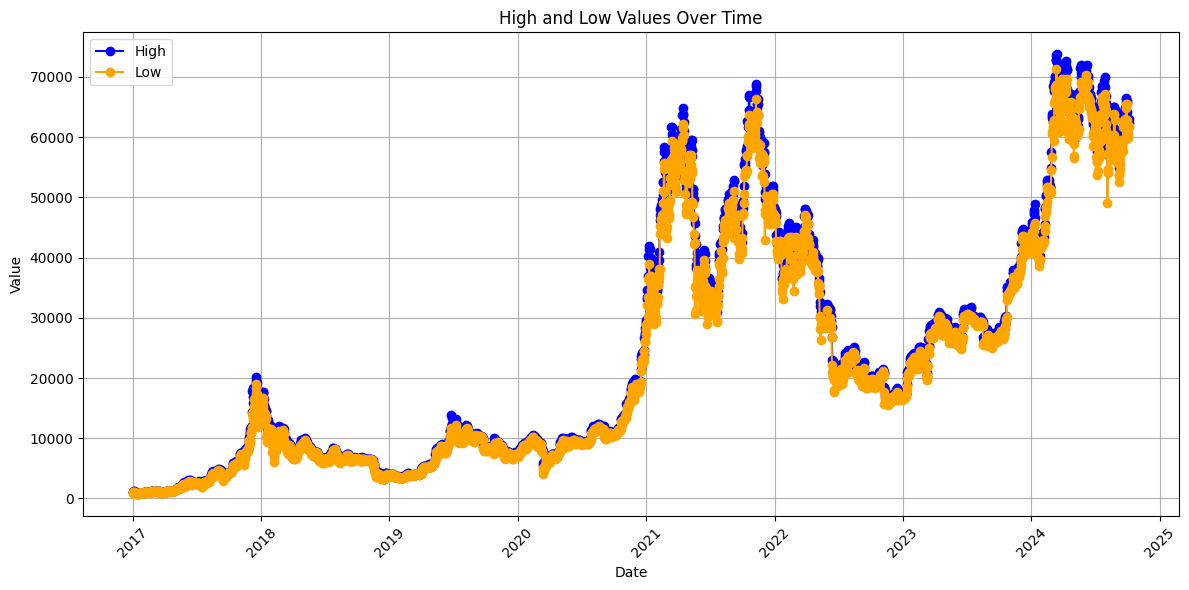

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High', color='blue', marker='o')
plt.plot(df['Date'], df['Low'], label='Low', color='orange', marker='o')
plt.title('High and Low Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45) 
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Year Analysis

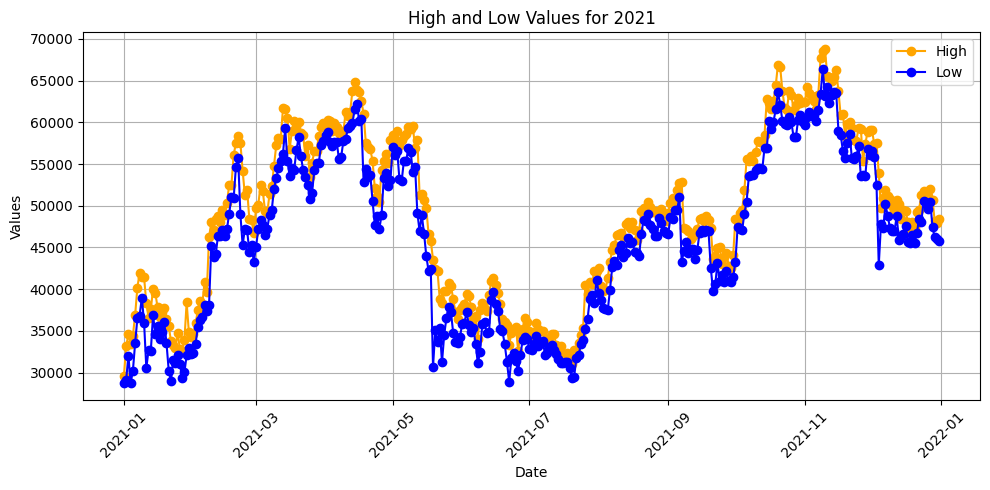

In [7]:
def filter_by_date(year):
    # Filter the DataFrame based on the specified year and month
    filtered_df = df[(df['Date'].dt.year == year)]
    
    return filtered_df[['Date', 'High', 'Low']]

# EDIT YEAR HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
year =2021
result = filter_by_date(year)

plt.figure(figsize=(10, 5))
plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange')
plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue')
plt.title(f'High and Low Values for {result["Date"].dt.strftime("%Y").iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Year and Month Analysis

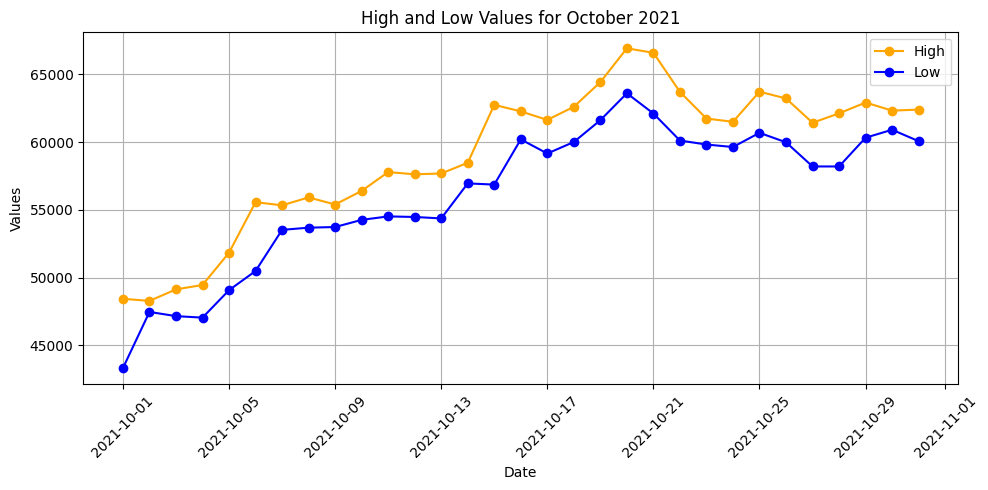

In [8]:
def filter_by_date(year, month):
  
    filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    
    return filtered_df[['Date', 'High', 'Low']]

# EDIT YEAR AND MONTH HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
year =2021
month = 10
result = filter_by_date(year, month)

plt.figure(figsize=(10, 5))
plt.plot(result['Date'], result['High'], marker='o', label='High', color='orange')
plt.plot(result['Date'], result['Low'], marker='o', label='Low', color='blue')
plt.title(f'High and Low Values for {result["Date"].dt.strftime("%B %Y").iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Day Open-Close Price Difference Across Years Analysis

Month: September, Day: 17


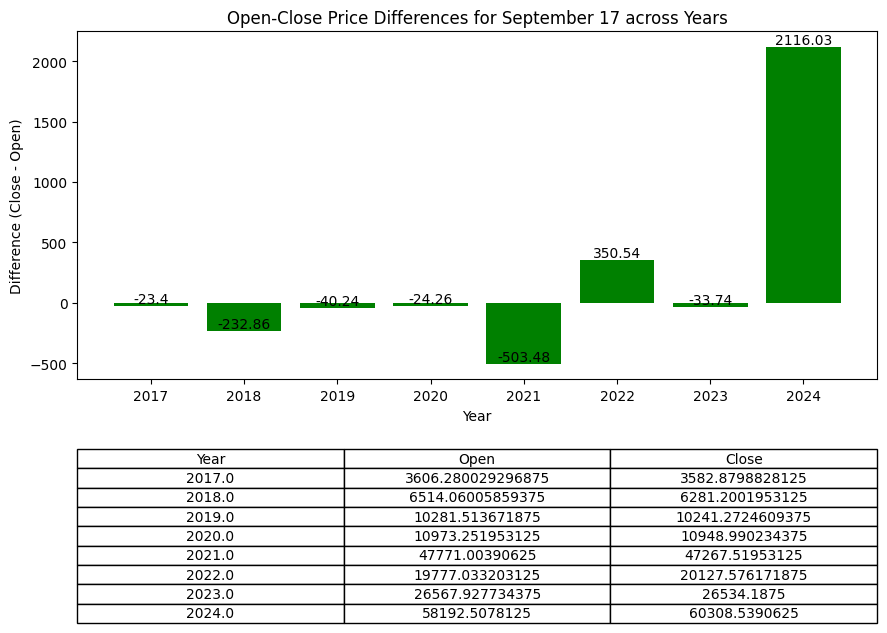

In [9]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Difference'] = df['Close'] - df['Open']

specific_dates = df[(df['Date'].dt.month == 9) & (df['Date'].dt.day == 17)]         # EDIT MONTH AND DATE HERE !!!!!!!!!!!!!!!!!!!


if not specific_dates.empty:
    month_str = specific_dates['Date'].dt.strftime('%B').iloc[0] 
    day = specific_dates['Date'].dt.day.iloc[0]                  
    print(f"Month: {month_str}, Day: {day}")

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(specific_dates['Year'], specific_dates['Difference'], color='green')

# Annotate each bar with the exact difference value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

ax.set_title(f'Open-Close Price Differences for {month_str} {day} across Years')
ax.set_xlabel('Year')
ax.set_ylabel('Difference (Close - Open)')

table_data = specific_dates[['Year', 'Open', 'Close']].values
column_labels = ['Year', 'Open', 'Close']
table = plt.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='bottom', bbox=[0, -0.7, 1, 0.5])

plt.subplots_adjust(left=0.1, bottom=0.3)

plt.show()